In [1]:
# Importing the Libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visualizations
import math # use math operators
import sqlalchemy as sq # use of sql commands
import plotly.express as px # interactive graphs

# Control the general style of the plots
sns.set_style('whitegrid')

# Reading csv as dataframe
g20_index_data = pd.read_csv("Datasets/Clean/UNION.csv")
g20_covid = pd.read_csv("Datasets/Clean/g20_covid.csv")

# g20_index_data.head()
# g20_covid.head()

In [2]:
g20_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [3]:
g20_index_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30847 entries, 0 to 30846
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     30847 non-null  object 
 1   Country  30847 non-null  object 
 2   USD      30847 non-null  float64
dtypes: float64(1), object(2)
memory usage: 723.1+ KB


In [42]:
# Cleaning Dataset

# Cleaning the date column to have only dates and not timestamps
g20_covid['date'] = pd.to_datetime(g20_covid['date'], format="%Y/%m/%d")
g20_index_data['date'] = pd.to_datetime(g20_index_data['date'], format="%Y/%m/%d")

# Replacing the missing values of the indexes with the last seen value
g20_index_data['USD'] = g20_index_data['USD'].replace(0, None)
g20_index_data.ffill(inplace=True)

# As we only have COVID data from february of 2020 we are going to cut g20_indexes to start the data from february of 2018
g20_index_data = g20_index_data[g20_index_data['date'] >= pd.to_datetime('2018-02-01', format="%Y/%m/%d")]

# Feature Engineering
# Creating a difference column for Index Data
# g20_index_data['difference'] = g20_index_data['USD'].diff()

# Creating a percentage of change for Index Data
# g20_index_data['pct_change'] = g20_index_data['USD'].pct_change()

# Creating a specific column from each part of the Date column
g20_covid['year'] = g20_covid['date'].dt.year
g20_covid['month'] = g20_covid['date'].dt.month
g20_covid['day'] = g20_covid['date'].dt.day
g20_covid['year_month'] = g20_covid['date'].dt.to_period('M')
g20_index_data['year'] = g20_index_data['date'].dt.year
g20_index_data['month'] = g20_index_data['date'].dt.month
g20_index_data['day'] = g20_index_data['date'].dt.day
g20_index_data['year_month'] = g20_index_data['date'].dt.to_period('M')

# Creating a return and pct_change column
g20_index_data = g20_index_data.sort_values(by=['date', 'Country'])

g20_index_data['return'] = 1
g20_index_data['pct_change'] = 1

for country in list(g20_index_data['Country'].unique()):
    g20_index_data.loc[g20_index_data['Country'] == country, 'return'] = g20_index_data.loc[g20_index_data['Country'] == country, 'USD'].diff()
    g20_index_data.loc[g20_index_data['Country'] == country, 'pct_change'] = g20_index_data.loc[g20_index_data['Country'] == country, 'USD'].pct_change()

# Creating a Continent Column
g20_index_data['Continent'] = g20_index_data['Country'].map({'Argentina':'South America', 'Australia':'Ocenia', 'Brazil':'South America', 'Canada':'North America',
                                    'China':'Asia', 'European Union':'Europe', 'France':'Europe', 'Germany':'Europe', 'India':'Asia', 'Indonesia':'Asia',
                                    'Italy':'Europe', 'Japan':'Asia', 'Mexico':'North America', 'Russia':'Asia', 'Saudi Arabia':'Asia', 'South Africa':'Africa', 
                                    'South Korea':'Asia', 'Turkey':'Asia', 'United Kingdom':'Europe', 'United States':'North America'})

g20_covid['Continent'] = g20_covid['location'].map({'Argentina':'South America', 'Australia':'Ocenia', 'Brazil':'South America', 'Canada':'North America',
                                    'China':'Asia', 'European Union':'Europe', 'France':'Europe', 'Germany':'Europe', 'India':'Asia', 'Indonesia':'Asia',
                                    'Italy':'Europe', 'Japan':'Asia', 'Mexico':'North America', 'Russia':'Asia', 'Saudi Arabia':'Asia', 'South Africa':'Africa', 
                                    'South Korea':'Asia', 'Turkey':'Asia', 'United Kingdom':'Europe', 'United States':'North America'})

1. How did COVID-19 impact the performance of the financial markets in G20 countries? 
    - What is the relationship between the prevalence and severity of COVID-19 (i.e., new COVID-19 cases, hospitalizations, ICU admissions, and deaths) in a country and the performance of that country’s strongest stock exchange index?

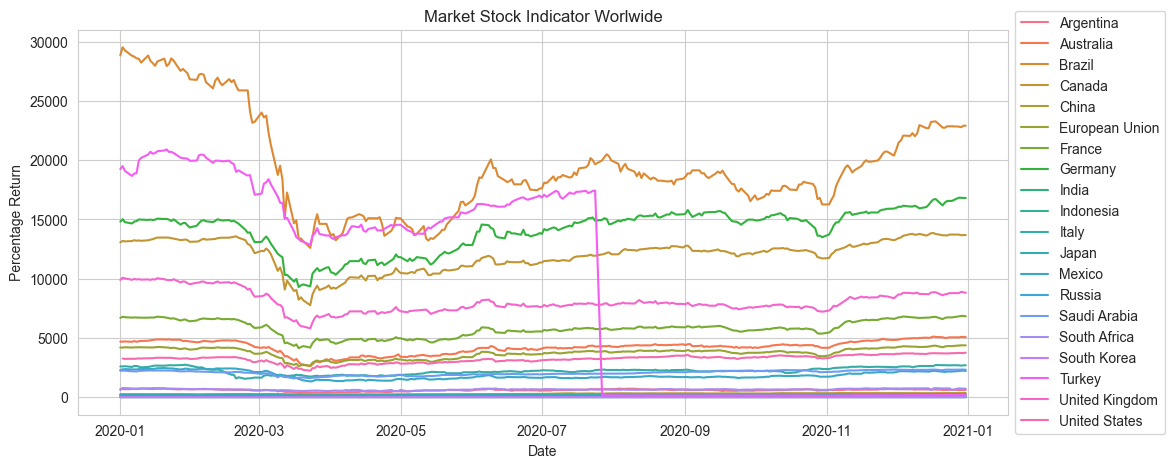

In [44]:
# Data Frames for 2019 and 2020
g20_index_data_2019 = g20_index_data[g20_index_data['year'] == 2019]
g20_index_data_2020 = g20_index_data[g20_index_data['year'] == 2020]

plt.figure(figsize=(12,5))
sns.lineplot(data=g20_index_data_2020, x='date', y='USD', hue='Country')
plt.xlabel('Date')
plt.ylabel('Percentage Return')
plt.title('Market Stock Indicator Worlwide')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

In [37]:
fig_worldwide = px.line(g20_index_data, x="date", y='USD', color='Country', 
            title="Market Stock Indicator Worldwide", labels={"date": "Date", "USD": "Price ($)"})
fig_worldwide.add_vline(x='2020-02-20', line_dash="dash")
fig_worldwide.add_vline(x='2020-04-07', line_dash="dash")
fig_worldwide.show()

In [38]:
# fig_north_america = px.line(g20_index_data[g20_index_data['Continent'] == 'North America'], x="date", y='USD', color='Country', 
#             title="Market Stock Indicator for North America", labels={"date": "Date", "USD": "Price ($)"})
# fig_north_america.add_vline(x='2020-02-20', line_dash="dash")
# fig_north_america.add_vline(x='2020-04-07', line_dash="dash")
# fig_north_america.show()

In [39]:
# fig_south_america = px.line(g20_index_data[g20_index_data['Continent'] == 'South America'], x="date", y='USD', color='Country', 
#             title="Market Stock Indicator for South America", labels={"date": "Date", "USD": "Price ($)"})
# fig_south_america.add_vline(x='2020-02-20', line_dash="dash")
# fig_south_america.add_vline(x='2020-04-07', line_dash="dash")
# fig_south_america.show()

In [40]:
# fig_asia = px.line(g20_index_data[g20_index_data['Continent'] == 'Asia'], x="date", y='USD', color='Country', 
#             title="Market Stock Indicator for Asia", labels={"date": "Date", "USD": "Price ($)"})
# fig_asia.add_vline(x='2020-02-20', line_dash="dash")
# fig_asia.add_vline(x='2020-04-07', line_dash="dash")
# fig_asia.show()

In [41]:
# fig_europe = px.line(g20_index_data[g20_index_data['Continent'] == 'Europe'], x="date", y='USD', color='Country', 
#             title="Market Stock Indicator for Asia", labels={"date": "Date", "USD": "Price ($)"})
# fig_europe.add_vline(x='2020-02-20', line_dash="dash")
# fig_europe.add_vline(x='2020-04-07', line_dash="dash")
# fig_europe.show()

In [45]:
for continent in list(g20_index_data['Continent'].unique()):
    fig_continent = px.line(g20_index_data[g20_index_data['Continent'] == continent], x="date", y='USD', color='Country', 
            title=('Market Stock Indicator for '+ str(continent)), labels={"date": "Date", "USD": "Price ($)"})
    fig_continent.add_vline(x='2020-02-20', line_dash="dash")
    fig_continent.add_vline(x='2020-04-07', line_dash="dash")
    fig_continent.show()